In [1]:
import hashlib
import random
import string
import time
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


In [2]:


difficulte = 4  
max_nonce = 2 ** 32  

def preuve_de_travail(block, difficulte):
    cible = "0" * difficulte
    for nonce in range(max_nonce):
        donnees = f'{block}{nonce}'.encode('utf-8')
        hachage = hashlib.sha256(donnees).hexdigest()
        if hachage[:difficulte] == cible:
            return nonce, hachage

def creer_bloc(precedent_bloc, donnees, difficulte):
    bloc = {
        "precedent_bloc": precedent_bloc,
        "donnees": donnees,
    }
    start_time = time.time()
    nonce, hachage = preuve_de_travail(str(bloc), difficulte)
    end_time = time.time()
    temps_execution = end_time - start_time

    bloc["nonce"] = nonce
    bloc["hachage"] = hachage
    bloc["temps_execution"] = temps_execution

    return bloc


if __name__ == "__main__":
    vect=np.zeros(10)
    for i in range (0,10):

        precedent_bloc = "0000000000000000000000000000000000000000000000000000000000000000"
        donnees = f"Transaction {i}"
        difficulte = 4

        nouveau_bloc = creer_bloc(precedent_bloc, donnees, difficulte)
        vect[i]=nouveau_bloc["temps_execution"]

    print(vect)        

[1.00398064e-03 1.41967845e+00 2.24467516e-01 1.76409960e-01
 3.78862143e-01 2.58693457e-01 4.21278477e-02 2.06010103e-01
 5.88335991e-02 6.71713352e-02]


In [9]:
stats.kstest(vect,stats.expon.cdf(vect,scale=4))

KstestResult(statistic=0.6, pvalue=0.05244755244755244)

In [3]:
###Simulation de Minage déviante (chaine de Markov )
def minage(q,n):
    R=0
    H=0
    p=1-q
    for i in range(0,n):
        if np.random.uniform()<q :
            if np.random.uniform()<q:
                if np.random.uniform()<q:
                    R=R+1
                    H=H+1
                R=R+2
                H=H+2
            else:
                if np.random.uniform()<q:
                    R=R+2
                H=H+2
        else:
            H=H+1
    return q,H,R,R/H


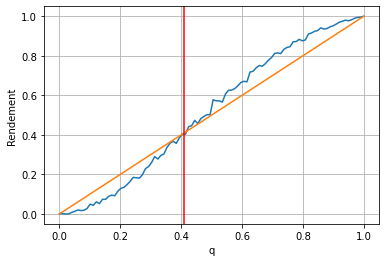

In [9]:
x=[]
y=[]
for q in np.linspace(0,1,100):
    vect=minage(q,1000)
    
    x.append(vect[0])
    y.append(vect[3])
plt.plot(x,y)
plt.plot(x,x)
plt.xlabel("q")
plt.ylabel("Rendement")
plt.axvline(x=0.41,color="red")
plt.grid()


In [12]:
### Jeu pile ou face 
def pileface(q,n):
    a=0
    h=0
    c=0
    for i in range(0,n):
        if a>h:
            a=a-h-1
            c=h+1-q
            h=0
            return a,h,c
        
        if np.random.rand()<q:
            a=a+1
        else:
            h=h+1
            c=c-q
    return a,h,c

        

In [14]:
x=np.zeros(3)
for i in range(0,100):
    x=x+pileface(0.3294,50)
print(x/100)

[ 9.2     20.8     -6.23328]


In [2]:
def pileface2(a,h,n,q,c):
    if n==0:
        return 0
    if a>h:
        return max(h+1-c+pileface2(a-h-1,0,n-1,q,c),q*pileface2(a+1,h,n-1,q,c)+(1-q)*pileface2(a,h+1,n-1,q,c))
    else:
        return max(pileface2(0,0,n-1,q,c), q*pileface2(a+1,h,n-1,q,c)+(1-q)*pileface2(a,h+1,n-1,q,c))

In [ ]:
q=0.3294
pileface2(0,0,50,q,q)